In [ ]:
import numpy.random as random
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation
from copy import copy, deepcopy

In [ ]:
# Inisialisasi parameter
M = 100 #panjang lintasan
p = 0.3 #probabilitas
v0 = 0 #kecepatan awal
N = 20 #jumlah kendaraan
t_max = 1000 #waktu maksimum
v_max = 5 #kecepatan maksimum
batas = [0,M] #panjang jalan
bawah = [30,30] #batas bawah jalan
atas = [70,70] #batas atas jalan
interval_1 = [80,80] #lintasan pada interval 80
interval_2 = [90,90] #lintasan pada interval 90
l = [30,70] #lebar jalan

In [ ]:
# Main program
v = v0
t0 = 0
waktu = []
perpindahan = []
kendaraan = np.array(sorted([[random.randint(1,M), 5] for i in range(1,N+1)]))
susunan_kendaraan = [i for i in range(N)] #semua mobil

print(susunan_kendaraan)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [ ]:
for t in range(t_max): #sampai waktu maksimum akan terus berjalan
    x_row = [] #array posisi
    for i in susunan_kendaraan: #posisi mobil
        car = kendaraan[i]
        next_car = kendaraan[i+1 if i+1 < N else 0] #posisi mobil maju jika posisi maju yang baru tersebut < N
        #mengupdate kecepatan masing-masing kendaraan secara sekuensial
        # v pertama
        v = np.min([v+1, v_max]) #v akan diupdate menjadi nilai minimum dari v+1 dan v_max

        # v kedua
        d = 2
        v = np.min([v, d-1]) #mencari yang paling minimum antara kecepatan dengan jarak antar mobil dikurang 1

        # v ketiga
        prob = random.rand() #mengupdate dengan probabilitas
        if (prob < p):
            v = np.max([0, v-1])

        # update posisi
        x = copy(car[0])
        x = x + v #mobil maju dengan menambahkan posisi dengan kecepatan
        # mengecek kondisi batas
        if (x >= M): #jika posisinya sudah lebih dari/sama dengan panjang lintasan
            temp = [] #array untuk menampung mobilnya
            for i in range(N):
                susunan = susunan_kendaraan[i] + N-1
                if (susunan + N-1 > N):
                    susunan = susunan - N
                temp.append(susunan)
            susunan_kendaraan = deepcopy(temp)
            x = x - M

            waktu.append(t-t0)
            t0 = t

        x_row.append(copy([x,car[1]]))

    kendaraan = deepcopy(x_row)
    perpindahan.append(deepcopy(x_row))

kepadatan = N/M
print('kepadatan: ',perpindahan)

#showing average time
print('rata-rata: ',sum(waktu)/len(waktu))

kepadatan:  [[[1, 5], [18, 5], [28, 5], [32, 5], [33, 5], [34, 5], [35, 5], [37, 5], [38, 5], [43, 5], [44, 5], [50, 5], [51, 5], [53, 5], [53, 5], [57, 5], [69, 5], [73, 5], [91, 5], [95, 5]], [[1, 5], [19, 5], [29, 5], [33, 5], [33, 5], [35, 5], [36, 5], [38, 5], [39, 5], [43, 5], [45, 5], [51, 5], [51, 5], [53, 5], [54, 5], [58, 5], [70, 5], [74, 5], [91, 5], [96, 5]], [[2, 5], [19, 5], [29, 5], [34, 5], [34, 5], [35, 5], [37, 5], [39, 5], [40, 5], [44, 5], [46, 5], [52, 5], [52, 5], [54, 5], [55, 5], [59, 5], [71, 5], [75, 5], [92, 5], [96, 5]], [[2, 5], [20, 5], [30, 5], [35, 5], [34, 5], [36, 5], [37, 5], [40, 5], [40, 5], [45, 5], [47, 5], [53, 5], [53, 5], [54, 5], [56, 5], [60, 5], [71, 5], [76, 5], [92, 5], [97, 5]], [[3, 5], [21, 5], [30, 5], [36, 5], [35, 5], [37, 5], [38, 5], [41, 5], [41, 5], [46, 5], [47, 5], [53, 5], [53, 5], [55, 5], [57, 5], [60, 5], [72, 5], [77, 5], [93, 5], [98, 5]], [[4, 5], [22, 5], [31, 5], [37, 5], [35, 5], [38, 5], [39, 5], [41, 5], [42, 5], [

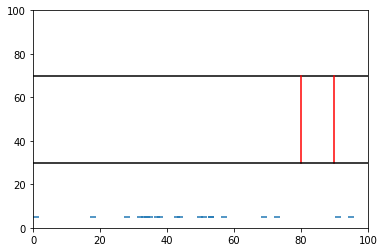

In [ ]:
# animating
global str
fig = plt.figure()
ax = plt.axes(ylim=(0,100), xlim=(0,M))
plt.plot(batas,atas,color='black')
plt.plot(interval_1,l,color='red')
plt.plot(interval_2,l,color='red')
plt.plot(batas,bawah,color='black')
car_marker = ax.scatter([], [], marker="_")

def animate(i):
    posisi_kendaraan = perpindahan[i]
    car_marker.set_offsets(posisi_kendaraan)
    return car_marker


anim = animation.FuncAnimation(fig, animate, frames=len(perpindahan), interval=100)

In [ ]:
from IPython import display
video = anim.to_html5_video();
html = display.HTML(video)
display.display(html)
plt.close()